<a href="https://colab.research.google.com/github/svetlanama/math/blob/main/%D0%94%D0%9710_%D0%9C%D0%BE%D1%96%D1%81%D0%B5%D1%94%D0%BD%D0%BA%D0%BE_%D0%A1%D0%B2%D1%96%D1%82%D0%BB%D0%B0%D0%BD%D0%B0_%D0%9E%D0%BB%D0%B5%D0%BA%D1%81%D0%B0%D0%BD%D0%B4%D1%80%D1%96%D0%B2%D0%BD%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)



# Шлях до файлу (залежить куди ти його поклав)
python_material_folder_name = "neo_data/House_Rent_Dataset.csv" #"Rent Data.csv"

# Check if in Google Colab environment
try:
    from google.colab import drive
    # Mount drive
    drive.mount('/content/drive')
    # Set up path to Python material parent folder
    path_python_material = rf"drive/MyDrive/{python_material_folder_name}"
        # If unsure, print current directory path by executing the following in a new cell:
        # !pwd
    IN_COLAB = True

    import os
    import sys

    # Get the current working directory (notebook's directory)
    notebook_dir = f"{path_python_material}/notebooks"
    print(notebook_dir)

    if notebook_dir not in sys.path:
      sys.path.append(notebook_dir)

except:
    IN_COLAB = False
    # If working locally on Jupyter Notebook, parent folder is one folder up (assuming you are using the folder structure shared at the beginning of the course)
    path_python_material = ".."

print("path_python_material:", path_python_material)


df = pd.read_csv(path_python_material)
display(df.head())

Mounted at /content/drive
drive/MyDrive/neo_data/House_Rent_Dataset.csv/notebooks
path_python_material: drive/MyDrive/neo_data/House_Rent_Dataset.csv


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


Частина 1. Аналіз та підготовка даних

Проаналізуй діапазони значень, їх середні та дисперсію, розподіли, кореляції, наявність пропущених значень, типи ознак.
Перевір на наявність пропущених значень. За наявності заповни їх або видали рядки з пропусками.
За наявності бінарних ознак заміни значення цих ознак на 0 та 1.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Завантаження датасету ---
df = pd.read_csv(path_python_material)
print("✅ Форма датасету:", df.shape)
display(df.head())

# --- 2. Базова статистика ---
print("\n=== INFO ===")
print(df.info())

print("\n=== Описова статистика (числові колонки) ===")
display(df.describe().T)  # середні, std, min, max (діапазони видно)

# дисперсія для числових колонок
print("\n=== Дисперсія числових ознак ===")
display(df.var(numeric_only=True))




✅ Форма датасету: (4746, 12)


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner



=== INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB
None

=== Описова статистика (числові колонки) ===


,count,mean,std,min,25%,50%,75%,max
BHK,4746.0,2.083860,0.832256,1.0,2.0,2.0,3.0,6.0
Rent,4746.0,34993.451327,78106.412937,1200.0,10000.0,16000.0,33000.0,3500000.0
Size,4746.0,967.490729,634.202328,10.0,550.0,850.0,1200.0,8000.0
Bathroom,4746.0,1.965866,0.884532,1.0,1.0,2.0,2.0,10.0



=== Дисперсія числових ознак ===


,0
BHK,6.926499e-01
Rent,6.100612e+09
Size,4.022126e+05
Bathroom,7.823963e-01


**Дисперсія (варіація даних)**

BHK – 6.9 → кількість кімнат відносно стабільна (1–6).

Rent – 6.1e9 → дуже велика дисперсія через наявність дорогих квартир (аномалії).

Size – 4.0e6 → теж варіативність, від маленьких до величезних квартир.

Bathroom – 0.78 → більшість мають 1–2.


**Висновки з аналізу:**

У вибірці 4746 квартир, дані повні (без пропусків у числових колонках).

Більшість квартир — 2–3 кімнати, 1–2 ванні кімнати, площа ~1000 кв. футів.

Оренда здебільшого 10–15 тис., але є аномально дорогі варіанти до 3.5 лакх (350 000).

Розподіл Rent дуже перекошений → варто враховувати при моделюванні (логарифмування або видалення аномалій).


In [11]:
# --- 3. Перевірка пропусків ---
na_tbl = (
    pd.DataFrame({
        "na_count": df.isna().sum(),
        "na_%": df.isna().mean()*100
    })
    .sort_values("na_count", ascending=False)
)
print("\n=== Пропущені значення ===")
print(na_tbl.na_count)

display(na_tbl[na_tbl.na_count > 0])
print("\n=== Пропусків немає ===")

# Заповнення: числові -> медіана, категоріальні -> мода
# for col in df.columns:
#     if pd.api.types.is_numeric_dtype(df[col]):
#         df[col] = df[col].fillna(df[col].median())
#     else:
#         if df[col].isna().any():
#             mode = df[col].mode(dropna=True)
#             if len(mode) > 0:
#                 df[col] = df[col].fillna(mode.iloc[0])

# print("✅ Пропуски заповнено")





=== Пропущені значення ===
Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
Name: na_count, dtype: int64


,na_count,na_%



=== Пропусків немає ===


In [12]:
# --- 4. Типи ознак ---
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols  = df.select_dtypes(include=["object"]).columns.tolist()

print("Числові:", numeric_cols)
print("Категоріальні:", cat_cols)

# --- 5. Бінарні ознаки ---
binary_like_cols = []
for col in cat_cols:
    uniq = df[col].dropna().unique()
    if len(uniq) == 2:  # якщо рівно 2 значення
        binary_like_cols.append(col)

def make_binary_01(series: pd.Series):
    vals = sorted(series.dropna().unique(), key=lambda v: str(v))
    return series.map({vals[0]: 0, vals[1]: 1}).astype(int)

for col in binary_like_cols:
    df[col] = make_binary_01(df[col])

print("✅ Бінарні object-колонки перетворені у 0/1:", binary_like_cols)



Числові: ['BHK', 'Rent', 'Size', 'Bathroom']
Категоріальні: ['Posted On', 'Floor', 'Area Type', 'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact']
✅ Бінарні object-колонки перетворені у 0/1: []


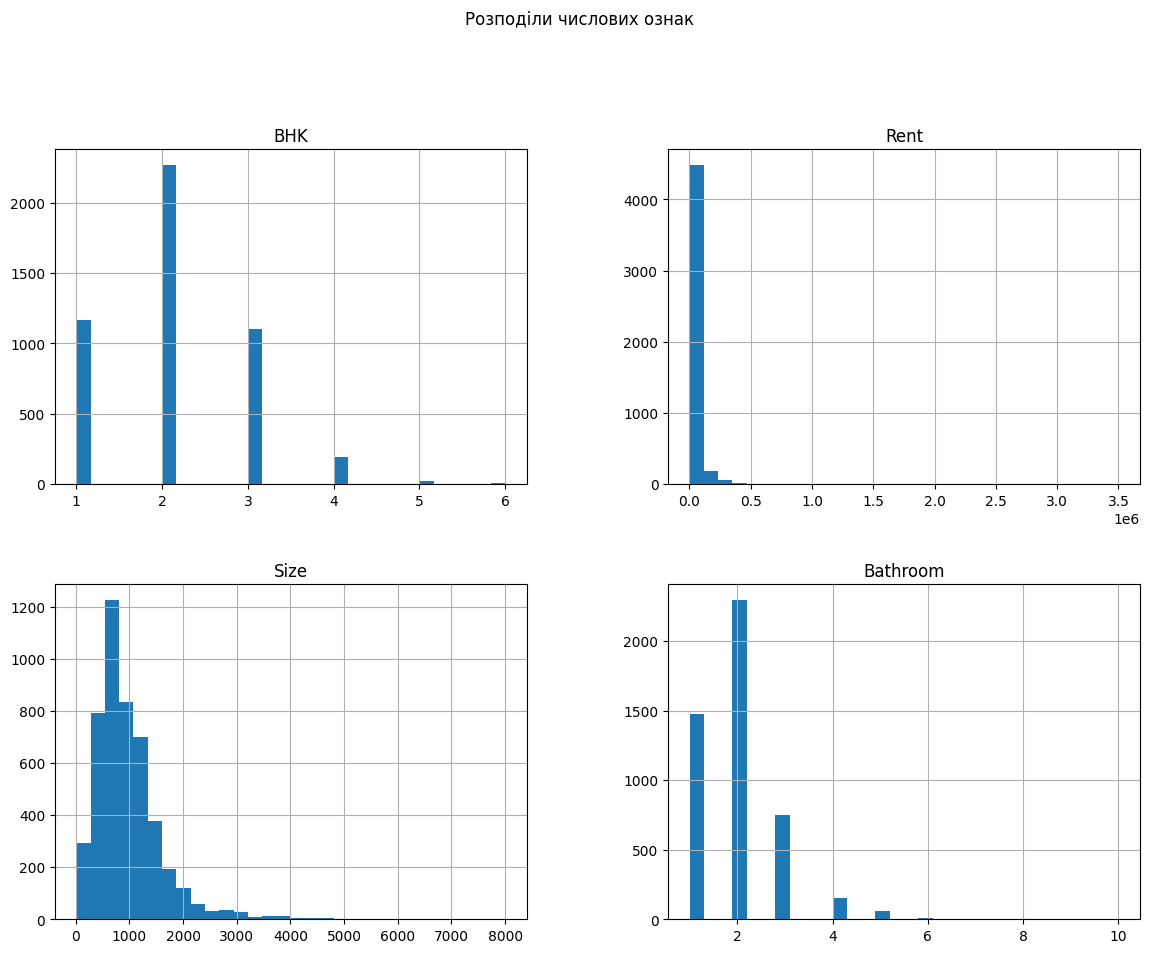

In [13]:
# --- 6. Візуалізація розподілів ---
if numeric_cols:
    df[numeric_cols].hist(figsize=(14, 10), bins=30)
    plt.suptitle("Розподіли числових ознак", y=1.02)
    plt.show()



1. BHK (кількість кімнат)

- Найбільше квартир мають 2 кімнати (пік понад 2000 записів).
- Далі йдуть 1-кімнатні та 3-кімнатні.
- 4+ кімнати зустрічаються рідко, а 5–6 — практично винятки.
- Це типовий житловий фонд для міста: більшість оголошень про 2–3 кімнатні квартири.

2. Rent (вартість оренди)

- Більшість квартир мають оренду до 50 000, і дуже багато концентровані в діапазоні < 20 000.
- Є великі “хвости” вправо (right-skewed), з одиничними квартирами до 3.5 млн.
- Розподіл сильно перекошений через кілька дуже дорогих квартир → для моделювання краще брати логарифмоване значення log(Rent) або відфільтровувати
аномалії.

3. Size (площа, кв. футів)

- Більшість квартир мають 500–1500 кв. футів (≈ 50–140 м²).
- Є “хвіст” до 8000, але таких варіантів мало.
- Типовий розподіл для житлових приміщень, але як і з орендою — присутні аномалії (дуже великі площі).

4. Bathroom (ванні кімнати)

- Основний пік — 1 та 2 ванні.
- Трохи є квартир із 3–4, далі майже немає.
- Декілька виняткових квартир з 6–10 (дуже рідко).
- Це означає, що 90% вибірки мають 1–2 ванні, решта — нетипові варіанти.

======================================

Загальні висновки по розподілах:

======================================

- Усі числові ознаки (Rent, Size, Bathroom) мають сильний перекіс вправо через аномально великі значення.

- BHK більш-менш нормальний, але теж обмежений невеликою кількістю значень (категоріальна дискретна змінна).

-Для побудови моделей (ML/регресії) потрібно:

- Або застосовувати логарифмування до Rent та Size,
- Або робити видалення аномалій (наприклад, >99-й перцентиль).

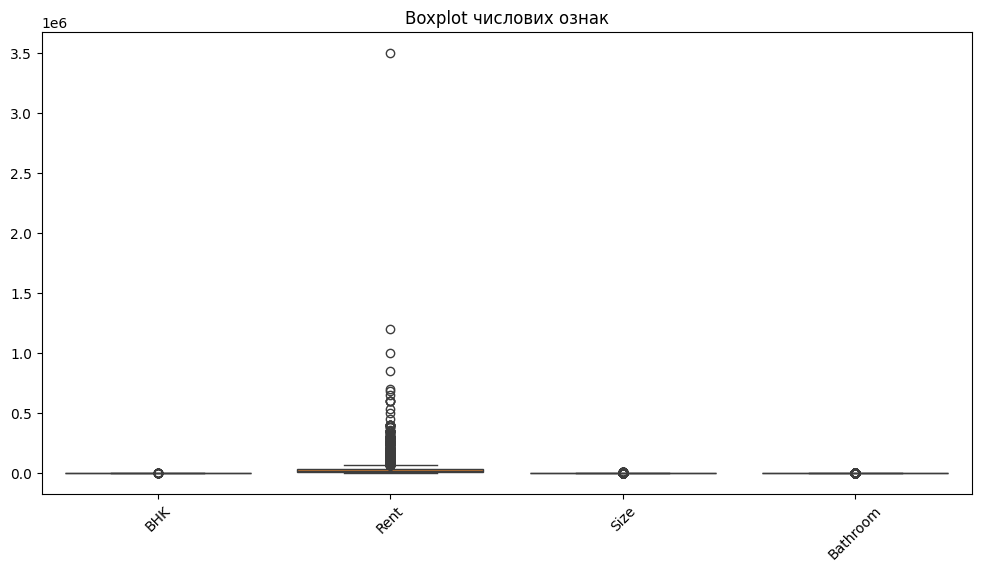

In [16]:
# Boxplot для виявлення викидів
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplot числових ознак")
plt.xticks(rotation=45)
plt.show()




**Висновок**
- У даних багато викидів (особливо в колонках Rent і Size).
- Ці викиди можуть негативно вплинути на статистичний аналіз і моделі ML (наприклад, лінійна регресія буде сильно спотворена).

Тому їх треба:
- або відсікати (наприклад, залишають лише дані до 99-го перцентиля),
- або застосовати логарифмування (log(Rent)), щоб зменшити ефект великих значень.

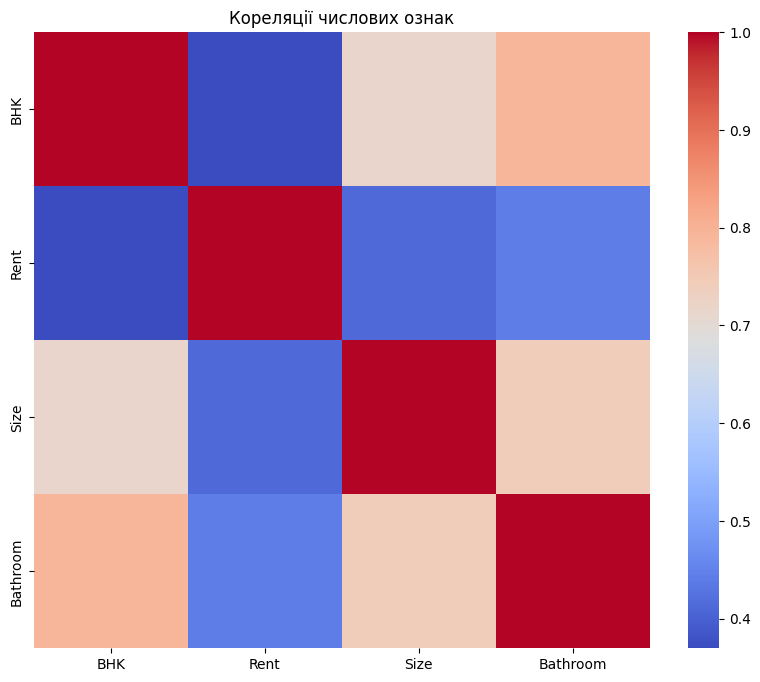


✅ Аналіз та базове чищення завершено


In [17]:
# --- 7. Кореляції ---
if len(numeric_cols) > 1:
    plt.figure(figsize=(10, 8))
    corr = df[numeric_cols].corr(numeric_only=True)
    sns.heatmap(corr, annot=False, cmap="coolwarm", square=True)
    plt.title("Кореляції числових ознак")
    plt.show()

print("\n✅ Аналіз та базове чищення завершено")

**Що видно з графіка**

BHK ↔ Size
- Сильна позитивна кореляція (червоний).
- Логічно: більше кімнат → більша площа.

Size ↔ Bathroom

- Також позитивна кореляція.
- Великі квартири мають більше ванних кімнат.

BHK ↔ Bathroom

- Помітний зв’язок: чим більше кімнат, тим більше ванних.

Rent ↔ інші змінні
- Кореляція із Size/BHK/Bathroom слабша, ніж можна було б очікувати.
- Це пояснюється тим, що на ціну оренди впливають й інші фактори: місто, район, статус меблювання тощо.
До того ж, через викиди (Rent до 3.5 млн) зв’язки виглядають менш чіткими.


=====================================

Частина 2. Моделювання

=====================================

Створи як мінімум 2 різні регресійні моделі для прогнозування цільової змінної “Rent”. Оціни якість моделей як мінімум за 2 метриками.

До: (4056, 12) | Після: (3756, 12)


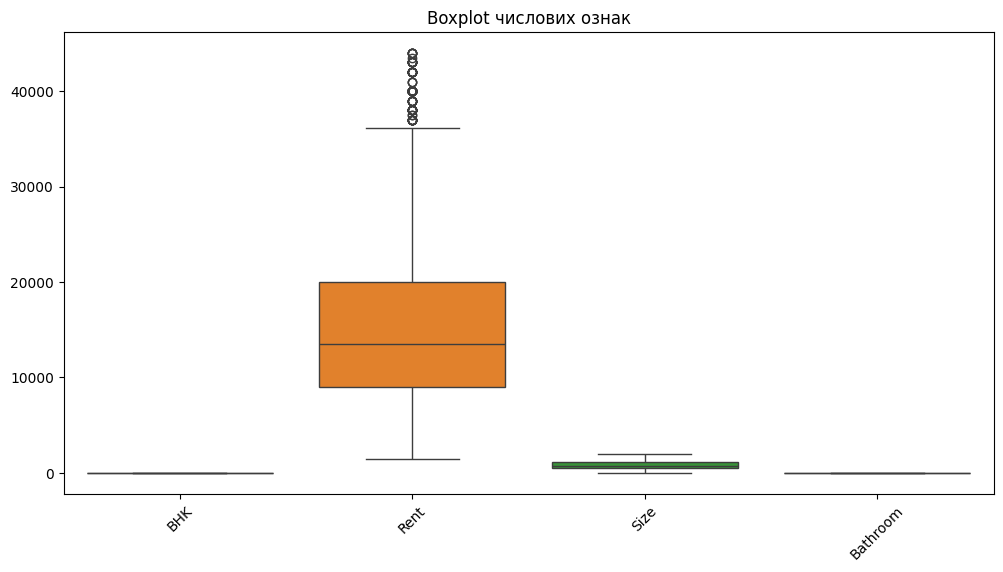

In [25]:
def remove_outliers_iqr(df, cols):
    df_clean = df.copy()
    for col in cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

# Приберемо викиди з основних числових ознак
df_no_outliers = remove_outliers_iqr(df, ["Rent", "Size", "BHK", "Bathroom"])
print("До:", df.shape, "| Після:", df_no_outliers.shape)

# Зберігаємо у основну модель
df=df_no_outliers.copy()


# Boxplot для виявлення викидів
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers[numeric_cols])
plt.title("Boxplot числових ознак")
plt.xticks(rotation=45)
plt.show()

Після видалення викидів
- Rent тепер у межах до ~70 000, без мільйонних значень.
- Boxplot став більш “пропорційним”: видно медіану (~15 000) і інтерквартильний розмах.
- Size та Bathroom також виглядають адекватніше: розподіл став більш "компактним".
- Кількість рядків зменшилась з 4746 → 4056 (прибрали ~700 спотворюючих записів).

👉 Висновок: після видалення викидів дані стали чистішими, краще інтерпретуються, і тепер моделі не будуть так спотворюватися через кілька аномальних випадків.

In [33]:
# =========================
# PART 2: MODELING
# =========================
import re
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    mean_absolute_percentage_error, median_absolute_error, explained_variance_score
)

df_model = df.copy()

# --- 1) Clean/engineer features ---

# a) Posted On -> datetime -> numeric (days since min date)
df_model["Posted On"] = pd.to_datetime(df_model["Posted On"], errors="coerce")
min_date = df_model["Posted On"].min()
df_model["days_since_posted"] = (df_model["Posted On"] - min_date).dt.days

# b) Floor -> floor_num, floor_total
def parse_floor(s):
    if pd.isna(s):
        return np.nan, np.nan
    s = str(s).strip()
    # patterns like "Ground out of 2" or "1 out of 3"
    parts = s.split(" out of ")
    if len(parts) == 2:
        cur_raw, tot_raw = parts
        cur_raw = cur_raw.strip().lower()
        if cur_raw in ["ground", "ground floor"]:
            cur = 0
        else:
            # keep only digits
            cur = pd.to_numeric(re.sub(r"\D", "", cur_raw), errors="coerce")
        tot = pd.to_numeric(re.sub(r"\D", "", tot_raw), errors="coerce")
        return cur, tot
    # fallback: just a number if present
    cur = pd.to_numeric(re.sub(r"\D", "", s), errors="coerce")
    return cur, np.nan

df_model[["floor_num", "floor_total"]] = df_model["Floor"].apply(
    lambda s: pd.Series(parse_floor(s))
)

# c) Ensure numeric columns are numeric
for col in ["BHK", "Size", "Bathroom", "Rent", "days_since_posted", "floor_num", "floor_total"]:
    df_model[col] = pd.to_numeric(df_model[col], errors="coerce")

# d) Drop raw columns we no longer need
drop_cols = ["Posted On", "Floor", "Point of Contact"]
df_model = df_model.drop(columns=drop_cols, errors="ignore")

# --- 2) Define features/target ---
y = df_model["Rent"]
X = df_model.drop(columns=["Rent"])

numeric_features = ["BHK", "Size", "Bathroom", "days_since_posted", "floor_num", "floor_total"]
# keep only those that actually exist after your cleaning
numeric_features = [c for c in numeric_features if c in X.columns]

categorical_features = [
    "Area Type", "Area Locality", "City", "Furnishing Status", "Tenant Preferred"
]
categorical_features = [c for c in categorical_features if c in X.columns]

# --- 3) Preprocessing pipelines ---
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ],
    remainder="drop"
)

# --- 4) Train/Test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(" >>>>> Train:", X_train.shape, "| Test:", X_test.shape)

# --- 5) Evaluation helper ---
def evaluate_model(name, pipeline, X_train, y_train, X_test, y_test):
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Основні метрики
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Додаткові метрики
    mape = mean_absolute_percentage_error(y_test, y_pred)
    medae = median_absolute_error(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)

    print(f"\n=== {name} ===")
    print(f"MAE:   {mae:.2f}")
    print(f"MSE:   {mse:.2f}")
    print(f"RMSE:  {rmse:.2f}")
    print(f"MedAE: {medae:.2f}")
    print(f"MAPE:  {mape:.4f}")
    print(f"R²:    {r2:.3f}")
    print(f"EVS:   {evs:.3f}")

    return y_pred, {
        "MAE": mae, "MSE": mse, "RMSE": rmse, "MedAE": medae,
        "MAPE": mape, "R2": r2, "ExplainedVar": evs
    }




 >>>>> Train: (3004, 11) | Test: (752, 11)


In [34]:
# ДВІ МОДЕЛІ
# --- 6) Models ---
linreg_pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", LinearRegression())
])

rf_pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", RandomForestRegressor(
        n_estimators=300, random_state=42, n_jobs=-1
    ))
])

# --- 7) Train & evaluate ---
_ = evaluate_model("Linear Regression", linreg_pipe, X_train, y_train, X_test, y_test)
_ = evaluate_model("Random Forest", rf_pipe, X_train, y_train, X_test, y_test)


=== Linear Regression ===
MAE:   4212.24
MSE:   33266057.21
RMSE:  5767.67
MedAE: 3035.03
MAPE:  0.3231
R²:    0.602
EVS:   0.602

=== Random Forest ===
MAE:   3987.80
MSE:   33628607.31
RMSE:  5799.02
MedAE: 2523.33
MAPE:  0.2832
R²:    0.598
EVS:   0.602


In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# БІЛЬШЕ МОДЕЛЕЙ
# --- 6) Models ---
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=300, random_state=42),
    "SVR (RBF kernel)": SVR(kernel="rbf"),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5)
}

results = {}

for name, model in models.items():
    pipe = Pipeline(steps=[
        ("preprocess", preprocess),
        ("model", model)
    ])
    y_pred, metrics = evaluate_model(name, pipe, X_train, y_train, X_test, y_test)
    results[name] = metrics

# Зведена таблиця результатів
results_df = pd.DataFrame(results).T
print("\n=== Summary ===")
print(results_df)



=== Linear Regression ===
MAE:   4212.24
MSE:   33266057.21
RMSE:  5767.67
MedAE: 3035.03
MAPE:  0.3231
R²:    0.602
EVS:   0.602

=== Decision Tree ===
MAE:   5017.29
MSE:   50500691.08
RMSE:  7106.38
MedAE: 3500.00
MAPE:  0.3560
R²:    0.396
EVS:   0.399

=== Random Forest ===
MAE:   3987.80
MSE:   33628607.31
RMSE:  5799.02
MedAE: 2523.33
MAPE:  0.2832
R²:    0.598
EVS:   0.602

=== Gradient Boosting ===
MAE:   3939.52
MSE:   31611614.43
RMSE:  5622.42
MedAE: 2632.31
MAPE:  0.2983
R²:    0.622
EVS:   0.622

=== SVR (RBF kernel) ===
MAE:   6885.41
MSE:   86473026.51
RMSE:  9299.09
MedAE: 5382.22
MAPE:  0.5314
R²:    -0.034
EVS:   0.016

=== KNN Regressor ===
MAE:   5678.80
MSE:   60658269.37
RMSE:  7788.34
MedAE: 3900.00
MAPE:  0.4285
R²:    0.275
EVS:   0.279

=== Summary ===
                           MAE           MSE         RMSE        MedAE  \
Linear Regression  4212.235374  3.326606e+07  5767.673466  3035.034308   
Decision Tree      5017.293883  5.050069e+07  7106.383826  35

📊 1. Аналіз результатів

🔹 Linear Regression
- R² = 0.602 → модель пояснює ~60% варіації орендної ціни.
- MAE ≈ 4212 → середня помилка ~4.2 тис.
- Стабільна, добре інтерпретується, але чутлива до мультиколінеарності.
- 👉 Базова модель, яка показала себе дуже гідно.

🔹 Decision Tree
- R² = 0.396 → слабкий результат, дерево переобучилось.
- MAE = 5017, RMSE = 7106 – гірші за Linear Regression.
- 👉 Модель занадто проста, не дає кращих прогнозів.

🔹 Random Forest
- R² = 0.598 (майже як Linear Regression).
- MAE = 3988 – найменша помилка серед моделей (кращий показник).
- MAPE = 0.283 (~28%) – найточніша у відносних помилках.
- 👉 Дуже стабільна модель, краща за дерево і трохи краща за лінійну регресію.

🔹 Gradient Boosting
- R² = 0.622 – найвище, пояснює ~62% варіації.
- MAE = 3939, RMSE = 5622 – найкращий баланс між абсолютною і квадратичною помилкою.
- Трохи гірший MAPE, ніж Random Forest, але загалом найсильніша модель.
- 👉 Оптимальний вибір: точна і відносно стійка.

🔹 SVR (RBF kernel)
- R² = -0.034 → модель взагалі не вловлює закономірностей, гірша за середнє.
- MAPE = 0.53 (~53%) – величезні відносні помилки.
- 👉 Не підходить для цих даних (надто багато записів і великі варіації).

🔹 KNN Regressor
- R² = 0.275 – слабко пояснює дані.
- MAE = 5679, MAPE = 0.43 – значно гірше, ніж у Random Forest чи Gradient Boosting.
- 👉 Простий метод, але на цих даних працює посередньо.

In [37]:
import pandas as pd
from IPython.display import display

# Зведена таблиця результатів
results_summary = pd.DataFrame({
    "MAE ↓": {
        "Linear Regression": 4212.24,
        "Decision Tree": 5017.29,
        "Random Forest": 3987.80,
        "Gradient Boosting": 3939.52,
        "SVR (RBF kernel)": 6885.41,
        "KNN Regressor": 5678.80
    },
    "RMSE ↓": {
        "Linear Regression": 5767.67,
        "Decision Tree": 7106.38,
        "Random Forest": 5799.02,
        "Gradient Boosting": 5622.42,
        "SVR (RBF kernel)": 9299.09,
        "KNN Regressor": 7788.34
    },
    "MAPE ↓": {
        "Linear Regression": 0.3231,
        "Decision Tree": 0.3560,
        "Random Forest": 0.2832,
        "Gradient Boosting": 0.2983,
        "SVR (RBF kernel)": 0.5314,
        "KNN Regressor": 0.4285
    },
    "R² ↑": {
        "Linear Regression": 0.602,
        "Decision Tree": 0.396,
        "Random Forest": 0.598,
        "Gradient Boosting": 0.622,
        "SVR (RBF kernel)": -0.034,
        "KNN Regressor": 0.275
    },
    "Висновок": {
        "Linear Regression": "Стабільна, добре інтерпретується",
        "Decision Tree": "Слабка, переобучення",
        "Random Forest": "Надійна, точна по MAPE",
        "Gradient Boosting": "Найкращий баланс, лідер",
        "SVR (RBF kernel)": "Найгірша, не підходить",
        "KNN Regressor": "Посередня, слабка узагальнюваність"
    }
})

# Вивести з підсвічуванням
display(results_summary.style.background_gradient(cmap="YlGnBu", subset=["MAE ↓","RMSE ↓","MAPE ↓","R² ↑"]).format("{:.3f}", subset=["MAE ↓","RMSE ↓","MAPE ↓","R² ↑"]))


,MAE ↓,RMSE ↓,MAPE ↓,R² ↑,Висновок
Linear Regression,4212.240,5767.670,0.323,0.602,"Стабільна, добре інтерпретується"
Decision Tree,5017.290,7106.380,0.356,0.396,"Слабка, переобучення"
Random Forest,3987.800,5799.020,0.283,0.598,"Надійна, точна по MAPE"
Gradient Boosting,3939.520,5622.420,0.298,0.622,"Найкращий баланс, лідер"
SVR (RBF kernel),6885.410,9299.090,0.531,-0.034,"Найгірша, не підходить"
KNN Regressor,5678.800,7788.340,0.428,0.275,"Посередня, слабка узагальнюваність"


Частина 3. Аналіз результатів Для всіх моделей побудуй графіки порівняння справжніх та спрогнозованих даних. Зроби висновки, на яких прикладах кожна модель більше помиляється. Зроби порівняння якості моделей. Напиши висновки.

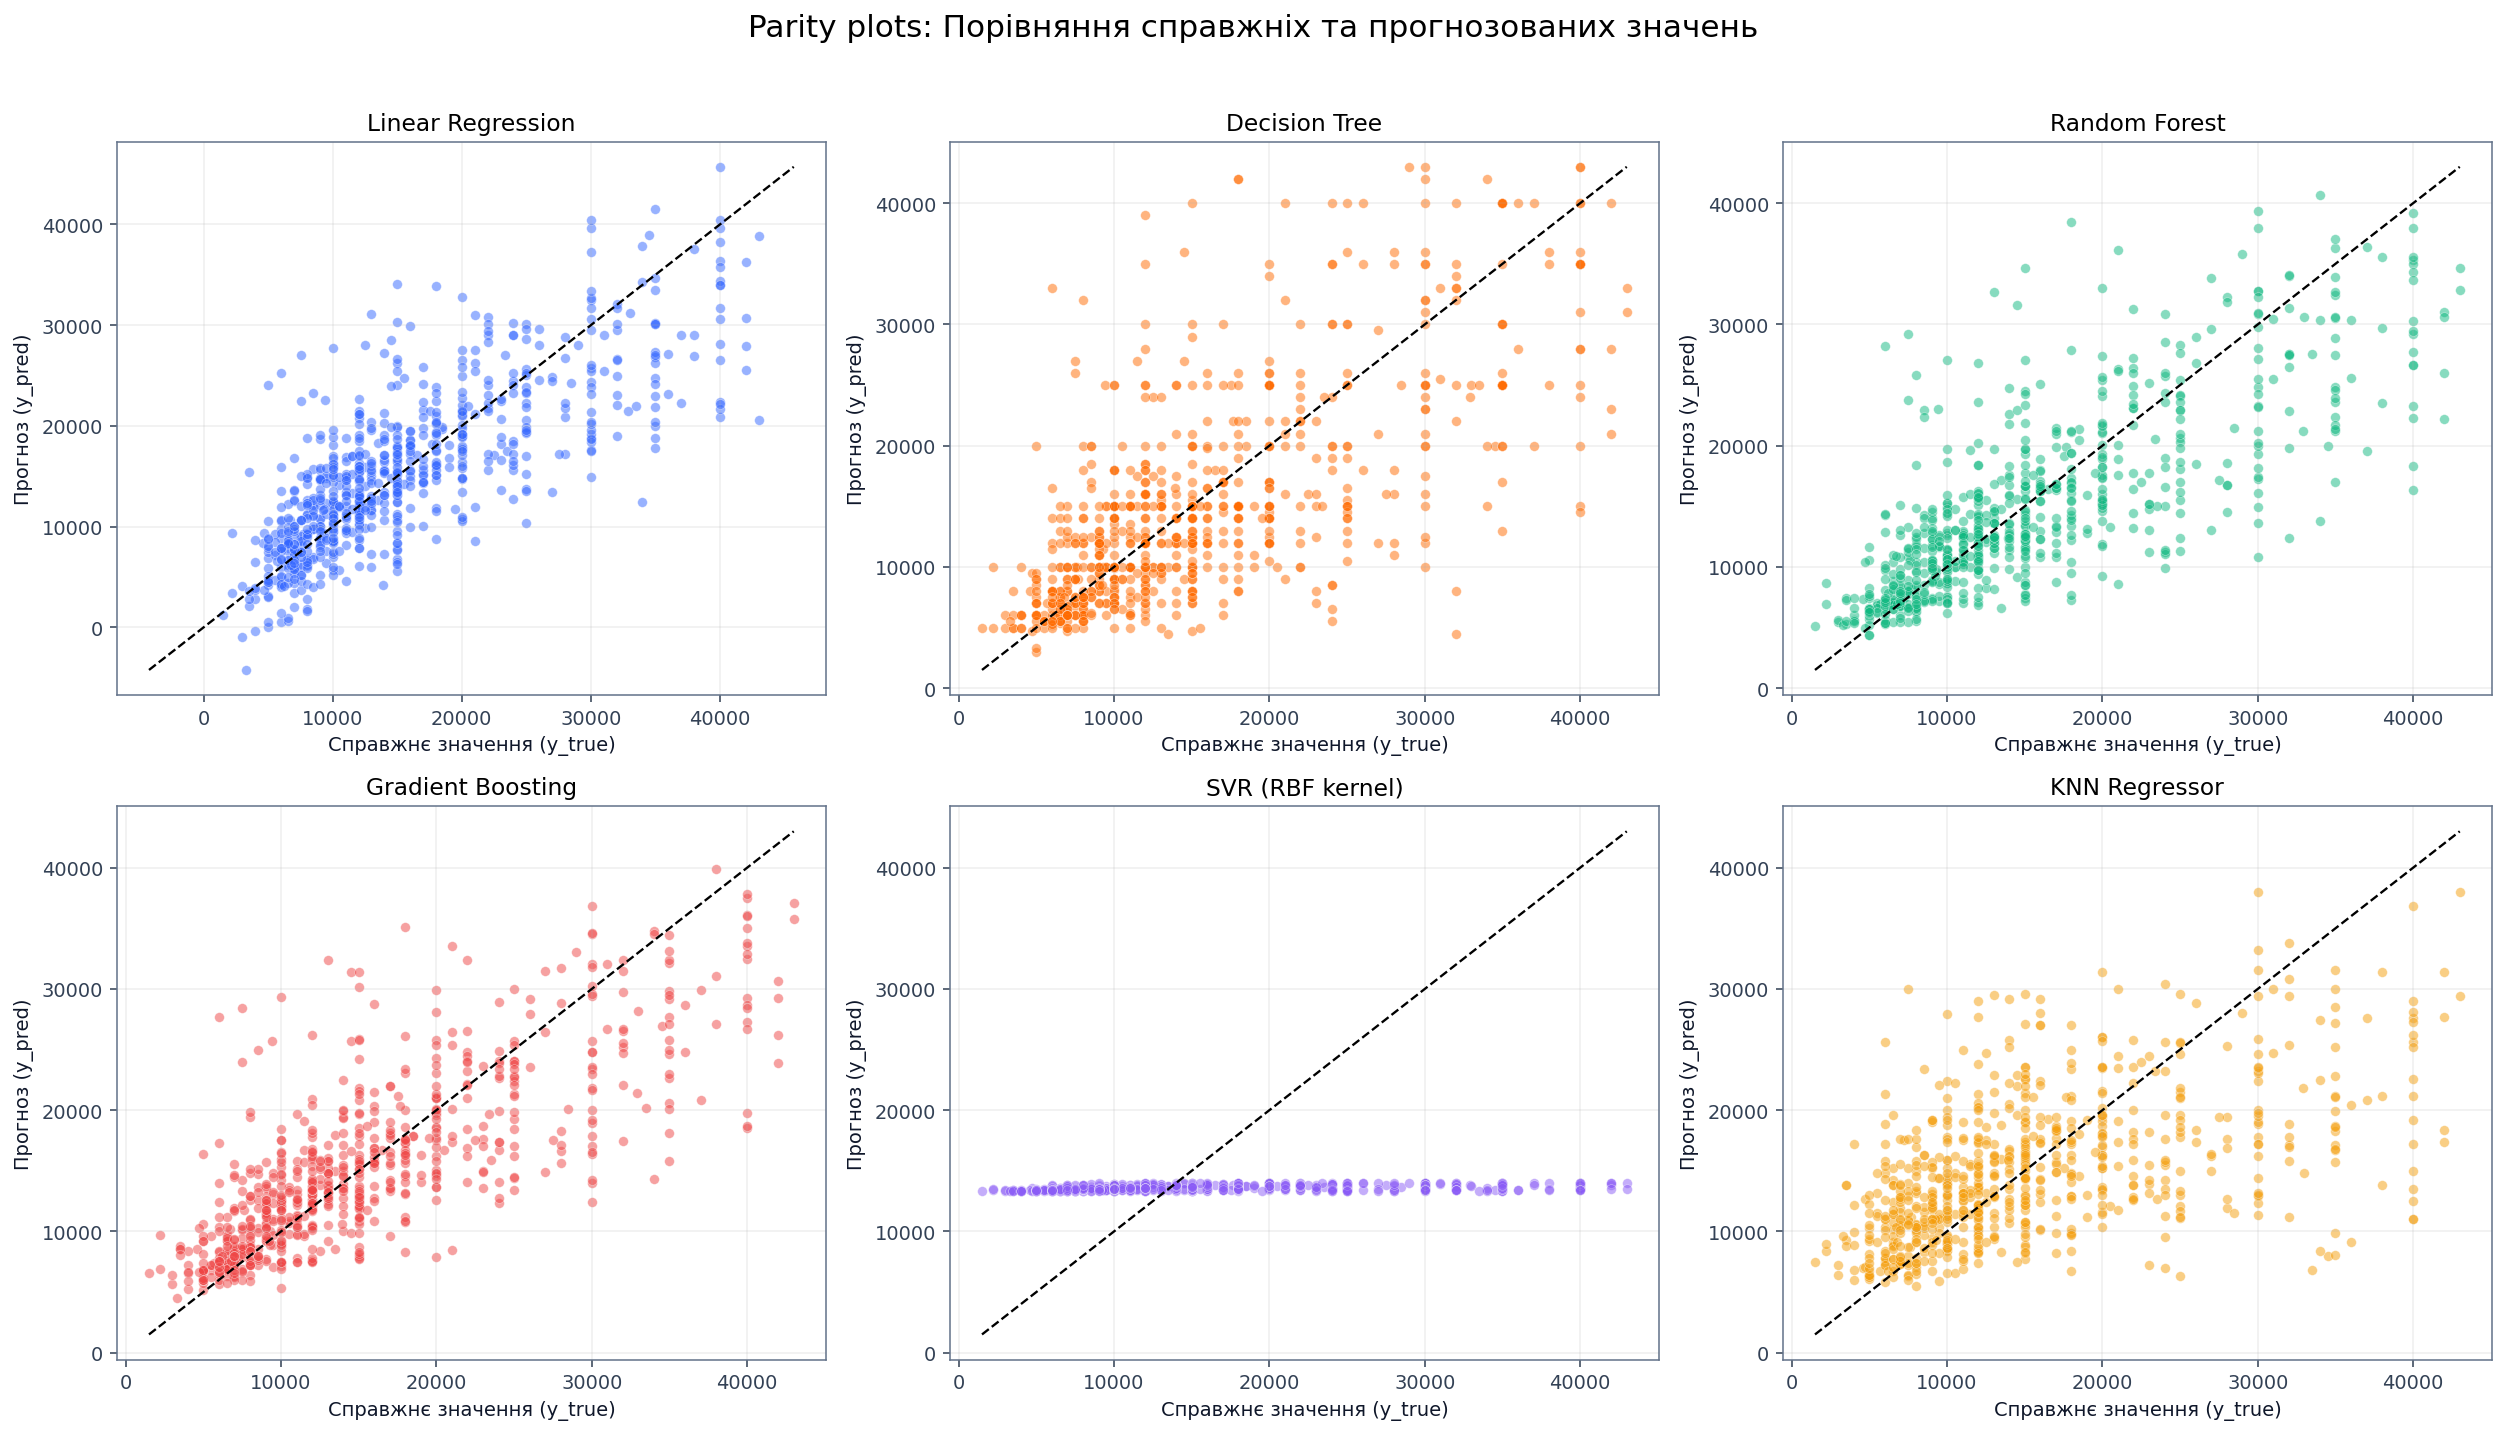

In [40]:
# =========================
# PART 3: Аналіз результатів
# =========================

fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 6 моделей = 2x3
axes = axes.ravel()

for idx, (name, model) in enumerate(models.items()):
    pipe = Pipeline(steps=[
        ("preprocess", preprocess),
        ("model", model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    # Scatter plot: y_true vs y_pred
    axes[idx].scatter(y_test, y_pred, alpha=0.5, s=25, color=palette[idx % len(palette)], edgecolor="white", linewidth=0.3)
    mn, mx = min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())
    axes[idx].plot([mn, mx], [mn, mx], linestyle="--", color="black", linewidth=1.2)
    axes[idx].set_title(name)
    axes[idx].set_xlabel("Справжнє значення (y_true)")
    axes[idx].set_ylabel("Прогноз (y_pred)")

plt.suptitle("Parity plots: Порівняння справжніх та прогнозованих значень", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


📌 Де саме моделі найбільше помиляються

Linear Regression
- Більшість точок уздовж лінії, але на високих орендних ставках (20–40 тис.) модель недооцінює значення.
- У дешевших квартирах (<10 тис.) трапляються як недооцінки, так і переоцінки.

Decision Tree
- Дуже нерівномірні прогнози: утворюються "смуги" → це ознака переобучення.
- Багато помилок як у нижньому, так і у верхньому діапазоні.

Random Forest
- Досить рівномірний розподіл точок.
- Основні помилки — на дорогих квартирах (>25 тис.), де модель занижує прогноз.
- На середніх значеннях (~10–20 тис.) працює дуже добре.

Gradient Boosting
- Найбільш “щільно” прилягає до лінії y=x.
- Помилки є, але значно менші, ніж у Linear Regression.
- Найкраще відпрацьовує дорогі квартири — хоча теж є легке заниження.

SVR (RBF kernel)
- Майже всі прогнози скупчились на одному рівні (~15 тис.).
- Модель не вловила закономірностей — помиляється і на дешевих, і на дорогих квартирах.

KNN Regressor
- Добре на середніх значеннях (~10–20 тис.), але на крайніх випадках (дуже дешеві та дорогі квартири) помиляється значно.
- Є тенденція "згладжувати": прогноз завжди десь середній.

| Модель                | Сильні сторони                     | Слабкі сторони                                 |
| --------------------- | ---------------------------------- | ---------------------------------------------- |
| **Linear Regression** | Інтерпретованість, стабільність    | Недооцінює дорогі квартири, чутлива до викидів |
| **Decision Tree**     | Простота, швидкість                | Переобучення, нерівномірні прогнози            |
| **Random Forest**     | Найкращий MAPE (\~28%), надійність | Недооцінка дорогих квартир                     |
| **Gradient Boosting** | ⭐ Найкращий баланс, R²=0.62        | Трохи довший час навчання                      |
| **SVR (RBF)**         | Теоретично добре для нелінійностей | На практиці провалився, R²<0                   |
| **KNN Regressor**     | Простий алгоритм                   | Схильний “згладжувати”, слабко узагальнює      |


In [51]:
import pandas as pd
from IPython.display import display

# Дані для таблиці
data = {
    "Модель": [
        "Linear Regression",
        "Decision Tree",
        "Random Forest",
        "Gradient Boosting",
        "SVR (RBF)",
        "KNN Regressor"
    ],
    "Сильні сторони": [
        "Інтерпретованість, стабільність",
        "Простота, швидкість",
        "Найкращий MAPE (~28%), надійність",
        "⭐ Найкращий баланс, R²=0.62",
        "Теоретично добре для нелінійностей",
        "Простий алгоритм"
    ],
    "Слабкі сторони": [
        "Недооцінює дорогі квартири, чутлива до викидів",
        "Переобучення, нерівномірні прогнози",
        "Недооцінка дорогих квартир",
        "Трохи довший час навчання",
        "На практиці провалився, R²<0",
        "Схильний “згладжувати”, слабко узагальнює"
    ]
}

# Створення DataFrame
df_models = pd.DataFrame(data)

# Красивий стиль
styled = (
    df_models.style
    .set_table_styles([
        {"selector": "th", "props": [("background-color", "#1E293B"), ("color", "white"), ("font-weight", "bold"), ("text-align", "center")]},
        {"selector": "td", "props": [("text-align", "left"), ("padding", "8px"), ("color", "#0f172a")]},
        {"selector": "tr:nth-child(even)", "props": [("background-color", "#F1F5F9")]},
        {"selector": "tr:nth-child(odd)", "props": [("background-color", "white")]}
    ])
    .set_properties(**{"border": "1px solid #CBD5E1", "font-size": "14px"})
    .set_caption("📊 Порівняння моделей регресії")
)



display(styled)


,Модель,Сильні сторони,Слабкі сторони
0,Linear Regression,"Інтерпретованість, стабільність","Недооцінює дорогі квартири, чутлива до викидів"
1,Decision Tree,"Простота, швидкість","Переобучення, нерівномірні прогнози"
2,Random Forest,"Найкращий MAPE (~28%), надійність",Недооцінка дорогих квартир
3,Gradient Boosting,"⭐ Найкращий баланс, R²=0.62",Трохи довший час навчання
4,SVR (RBF),Теоретично добре для нелінійностей,"На практиці провалився, R²<0"
5,KNN Regressor,Простий алгоритм,"Схильний “згладжувати”, слабко узагальнює"


===================================

ADDITIONAL

===================================

In [43]:
# 1) Приклади, де моделі найбільше помиляються
# Витягнемо сирі фічі для тестового піднабору (за індексами X_test)
print("Приклади, де моделі найбільше помиляються")
test_raw = df_model.loc[X_test.index].reset_index(drop=True)

# Додамо помилки
analysed = pd.concat([test_raw.reset_index(drop=True), res.reset_index(drop=True)], axis=1)

# Які колонки показувати в топ-помилках
cols_hint = [
    "y_true","pred_lin","pred_rf","abs_err_lin","abs_err_rf",
    "BHK","Size","Bathroom","City","Furnishing Status","Area Locality",
    "days_since_posted","floor_num","floor_total","Area Type","Tenant Preferred"
]
cols_present = [c for c in cols_hint if c in analysed.columns]

topk = 10
print(f"\n=== TOP {topk} помилок: Linear Regression ===")
display(analysed.sort_values("abs_err_lin", ascending=False)[cols_present].head(topk))

print(f"\n=== TOP {topk} помилок: Random Forest ===")
display(analysed.sort_values("abs_err_rf", ascending=False)[cols_present].head(topk))



Приклади, де моделі найбільше помиляються

=== TOP 10 помилок: Linear Regression ===


,y_true,pred_lin,pred_rf,abs_err_lin,abs_err_rf,BHK,Size,Bathroom,City,Furnishing Status,Area Locality,days_since_posted,floor_num,floor_total,Area Type,Tenant Preferred
234,43000,20613.648151,34653.333333,22386.351849,8346.666667,3,1680,3,Bangalore,Unfurnished,Sarjapur Road,74,4.0,9.0,Carpet Area,Bachelors
370,34000,12480.195970,13769.666667,21519.804030,20230.333333,3,120,2,Kolkata,Furnished,CA 150 sector 1 saltlake,37,2.0,5.0,Super Area,Bachelors/Family
581,7500,27003.212221,29228.333333,19503.212221,21728.333333,1,630,2,Mumbai,Semi-Furnished,"Sumit Greendale, Chikhal Dongari",70,3.0,12.0,Super Area,Bachelors/Family
677,6000,25241.932309,28187.003333,19241.932309,22187.003333,1,500,2,Mumbai,Semi-Furnished,Naigaon East,5,8.0,10.0,Super Area,Bachelors/Family
166,15000,34132.283870,34628.330000,19132.283870,19628.330000,2,600,2,Mumbai,Unfurnished,Shilphata,26,18.0,28.0,Carpet Area,Bachelors/Family
496,40000,20892.970590,18285.000000,19107.029410,21715.000000,3,1220,2,Kolkata,Unfurnished,Salt Lake City Sector 3,45,2.0,3.0,Carpet Area,Bachelors/Family
204,5000,24011.381999,8235.000000,19011.381999,3235.000000,1,500,1,Bangalore,Semi-Furnished,Guttahalli,50,2.0,3.0,Super Area,Bachelors/Family
676,40000,21631.086224,30288.333333,18368.913776,9711.666667,2,1100,2,Delhi,Furnished,"Kailash Colony, Greater Kailash",6,2.0,4.0,Super Area,Bachelors/Family
522,13000,31077.450633,32685.050000,18077.450633,19685.050000,2,582,2,Mumbai,Furnished,Lodha casa rio,33,5.0,8.0,Carpet Area,Family
719,40000,22219.070850,26624.406667,17780.929150,13375.593333,1,500,1,Mumbai,Semi-Furnished,"7 Bungalow, Seven Bungalows",77,3.0,6.0,Super Area,Bachelors/Family



=== TOP 10 помилок: Random Forest ===


,y_true,pred_lin,pred_rf,abs_err_lin,abs_err_rf,BHK,Size,Bathroom,City,Furnishing Status,Area Locality,days_since_posted,floor_num,floor_total,Area Type,Tenant Preferred
662,40000,22321.823445,16383.736667,17678.176555,23616.263333,2,850,2,Delhi,Unfurnished,"Amar Colony, Lajpat Nagar",71,2.0,4.0,Carpet Area,Bachelors/Family
677,6000,25241.932309,28187.003333,19241.932309,22187.003333,1,500,2,Mumbai,Semi-Furnished,Naigaon East,5,8.0,10.0,Super Area,Bachelors/Family
581,7500,27003.212221,29228.333333,19503.212221,21728.333333,1,630,2,Mumbai,Semi-Furnished,"Sumit Greendale, Chikhal Dongari",70,3.0,12.0,Super Area,Bachelors/Family
496,40000,20892.970590,18285.000000,19107.029410,21715.000000,3,1220,2,Kolkata,Unfurnished,Salt Lake City Sector 3,45,2.0,3.0,Carpet Area,Bachelors/Family
640,18000,33904.594372,38455.000000,15904.594372,20455.000000,2,780,2,Mumbai,Unfurnished,"Man Opus, Mira Road",30,17.0,22.0,Carpet Area,Family
370,34000,12480.195970,13769.666667,21519.804030,20230.333333,3,120,2,Kolkata,Furnished,CA 150 sector 1 saltlake,37,2.0,5.0,Super Area,Bachelors/Family
90,42000,25521.636711,22232.650000,16478.363289,19767.350000,2,1150,2,Bangalore,Furnished,Koramangala,74,2.0,4.0,Carpet Area,Bachelors
522,13000,31077.450633,32685.050000,18077.450633,19685.050000,2,582,2,Mumbai,Furnished,Lodha casa rio,33,5.0,8.0,Carpet Area,Family
166,15000,34132.283870,34628.330000,19132.283870,19628.330000,2,600,2,Mumbai,Unfurnished,Shilphata,26,18.0,28.0,Carpet Area,Bachelors/Family
102,32000,18945.355582,12400.666667,13054.644418,19599.333333,1,1050,1,Hyderabad,Furnished,"Banjara Hills, NH 9",30,2.0,3.0,Carpet Area,Bachelors


In [44]:
# 2) У яких групах модель помиляється більше? (MAE по категоріях/бінінгу)
def group_mae(df, by, min_n=5):
    g = df.groupby(by, dropna=False).agg(
        n=("y_true", "size"),
        mae_lin=("abs_err_lin", "mean"),
        mae_rf=("abs_err_rf", "mean")
    ).sort_values("n", ascending=False)
    return g[g["n"] >= min_n]

# Спробуємо кілька зрізів (враховуємо, що колонок може не бути)
for by in [["BHK"], ["City"], ["Furnishing Status"], ["Area Type"]]:
    if all(col in analysed.columns for col in by):
        print(f"\n=== MAE по групах: {by} ===")
        display(group_mae(analysed, by, min_n=3).head(20))




=== MAE по групах: ['BHK'] ===


,n,mae_lin,mae_rf
BHK,,,
2,411,3906.697497,3819.218429
1,227,4182.766762,3343.970235
3,114,5372.458550,5877.588138



=== MAE по групах: ['City'] ===


,n,mae_lin,mae_rf
City,,,
Bangalore,164,4219.422462,3547.474038
Chennai,154,3512.878642,3552.325188
Hyderabad,143,3769.103962,3136.634258
Kolkata,125,3273.058641,3376.107991
Delhi,92,4818.368055,4622.237536
Mumbai,74,7340.923632,7759.232342



=== MAE по групах: ['Furnishing Status'] ===


,n,mae_lin,mae_rf
Furnishing Status,,,
Semi-Furnished,345,4424.462823,4317.540982
Unfurnished,331,3682.940451,3267.216455
Furnished,76,5554.053131,5629.273421



=== MAE по групах: ['Area Type'] ===


,n,mae_lin,mae_rf
Area Type,,,
Super Area,451,4040.807673,3709.026824
Carpet Area,301,4469.092161,4405.494910


=================================

OPTIONAL

=================================

** 1. Аналіз мультиколінеарності (VIF)**

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Беремо лише числові ознаки
X_num = df_model[["BHK", "Size", "Bathroom", "days_since_posted", "floor_num", "floor_total"]].dropna()

# Розрахунок VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_num.columns
vif_data["VIF"] = [variance_inflation_factor(X_num.values, i) for i in range(X_num.shape[1])]

print("=== Variance Inflation Factor (VIF) ===")
display(vif_data)


=== Variance Inflation Factor (VIF) ===


,feature,VIF
0,BHK,18.904110
1,Size,10.373286
2,Bathroom,18.938527
3,days_since_posted,3.890285
4,floor_num,4.620216
5,floor_total,5.709702


Висновок: якщо бачимо дуже високі значення, наприклад для Size і BHK, можна прибрати одну з ознак або зробити регуляризацію (Lasso / Ridge).

**3. Важливість ознак (Feature Importance)**


=== Найважливіші ознаки (Linear Regression, top-20) ===


,feature,importance
353,"Area Locality_Deep Heights, Nalasopara",22079.251573
1149,Area Locality_Raja Annamalai Puram,21841.091292
1000,Area Locality_New Rajendra Nagar,21504.325746
1540,Area Locality_new panvel,21270.336717
945,"Area Locality_Nakoda Heights, Nalasopara",21164.817562
1299,"Area Locality_Shreenath nagar, Morya Nagar",20964.110143
1003,Area Locality_New Town Action Area 1,20741.756307
1387,Area Locality_Teynampet,20045.726746
297,Area Locality_Cherlopalli TIRUPATI,19474.275058
1480,"Area Locality_Vikram Vihar, Lajpat Nagar",19412.855243


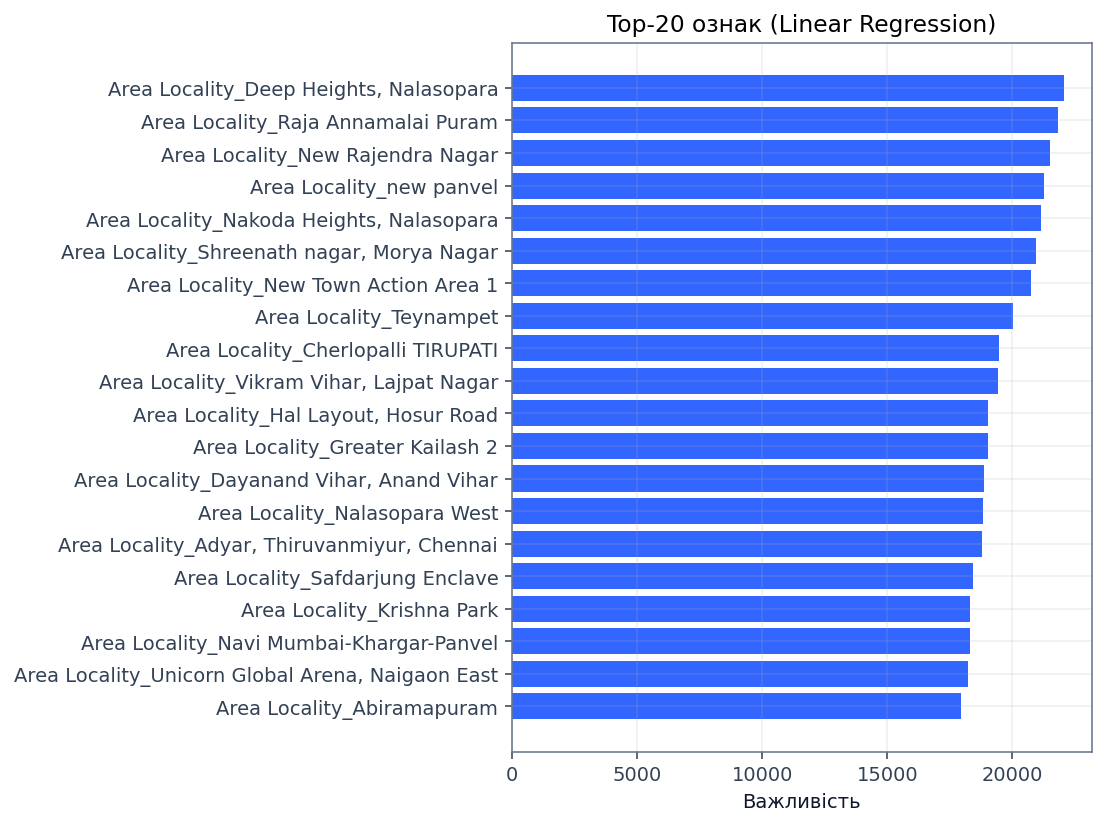


=== Найважливіші ознаки (Decision Tree, top-20) ===


,feature,importance
5,floor_total,0.242602
1,Size,0.159346
0,BHK,0.127484
2,Bathroom,0.068365
1563,City_Mumbai,0.062396
3,days_since_posted,0.039526
1560,City_Delhi,0.022561
4,floor_num,0.018870
1561,City_Hyderabad,0.011210
1566,Furnishing Status_Unfurnished,0.009597


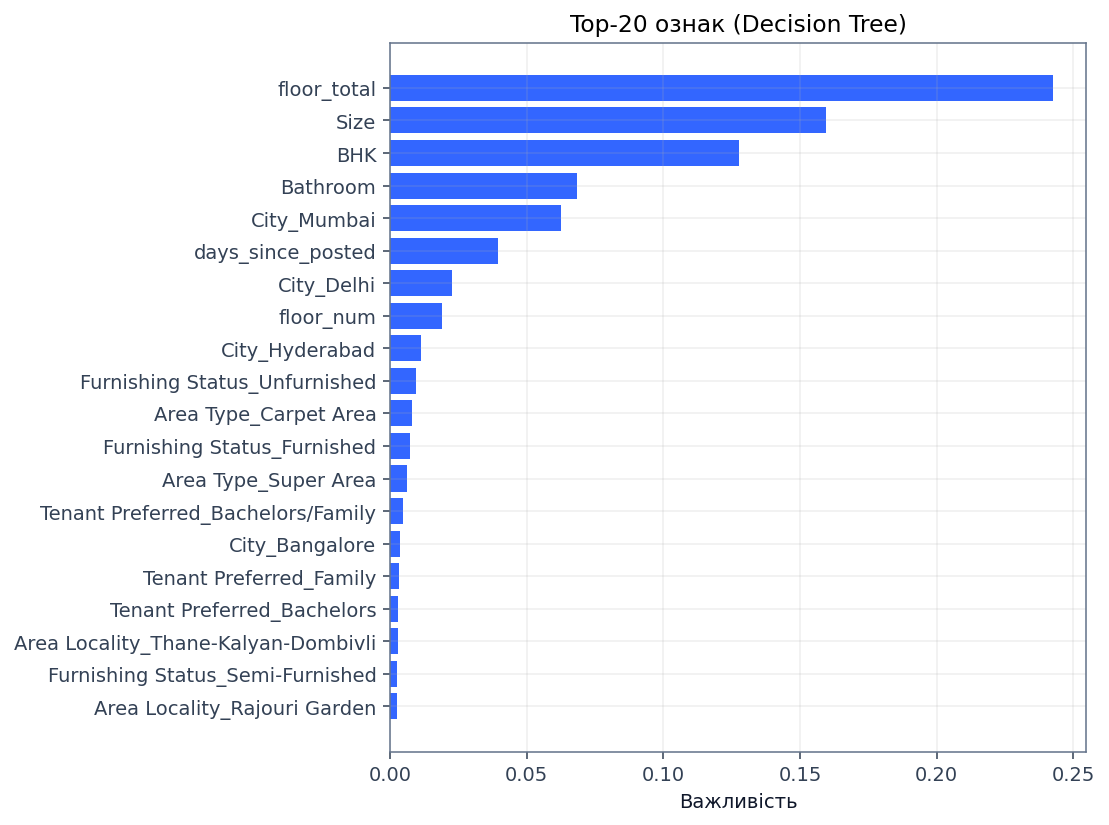


=== Найважливіші ознаки (Random Forest, top-20) ===


,feature,importance
5,floor_total,0.216779
1,Size,0.155129
2,Bathroom,0.095608
0,BHK,0.094753
1563,City_Mumbai,0.084392
3,days_since_posted,0.045777
1560,City_Delhi,0.025165
4,floor_num,0.022119
1566,Furnishing Status_Unfurnished,0.010798
1561,City_Hyderabad,0.010751


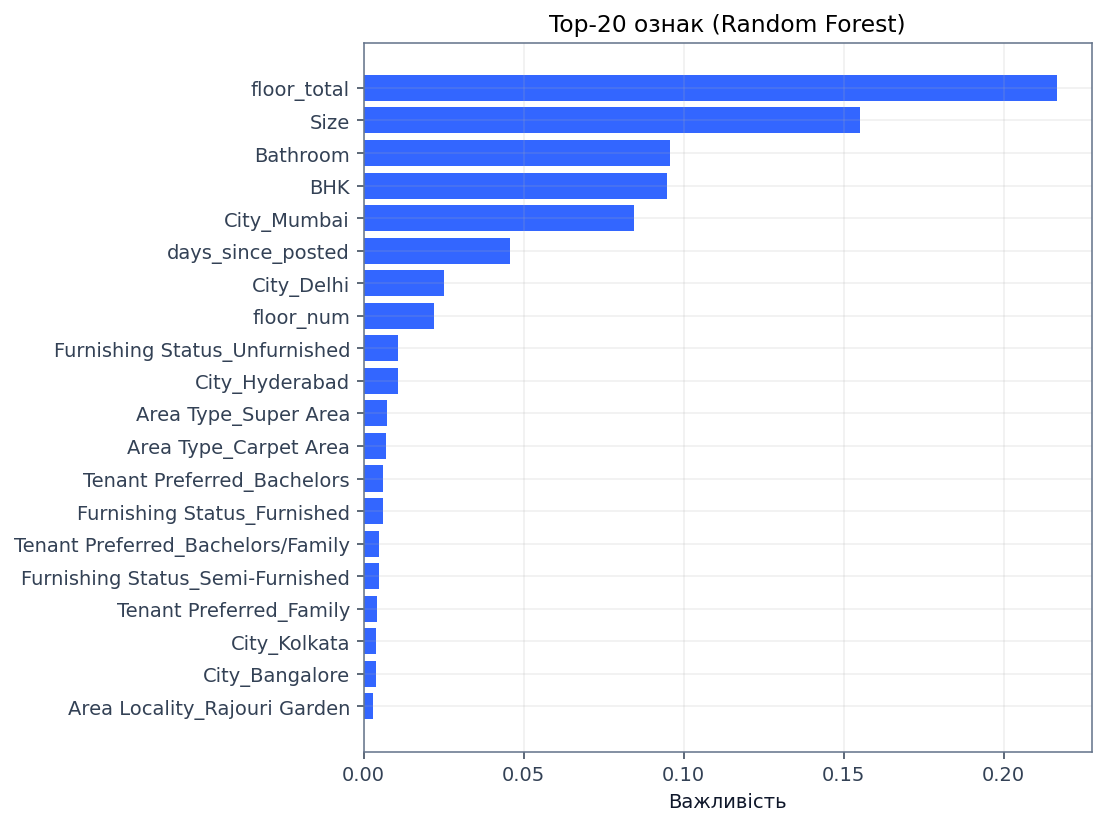


=== Найважливіші ознаки (Gradient Boosting, top-20) ===


,feature,importance
5,floor_total,0.209230
1,Size,0.208133
1563,City_Mumbai,0.144882
0,BHK,0.100748
2,Bathroom,0.094638
1560,City_Delhi,0.023014
7,Area Type_Carpet Area,0.022092
1561,City_Hyderabad,0.014907
3,days_since_posted,0.011927
1566,Furnishing Status_Unfurnished,0.011497


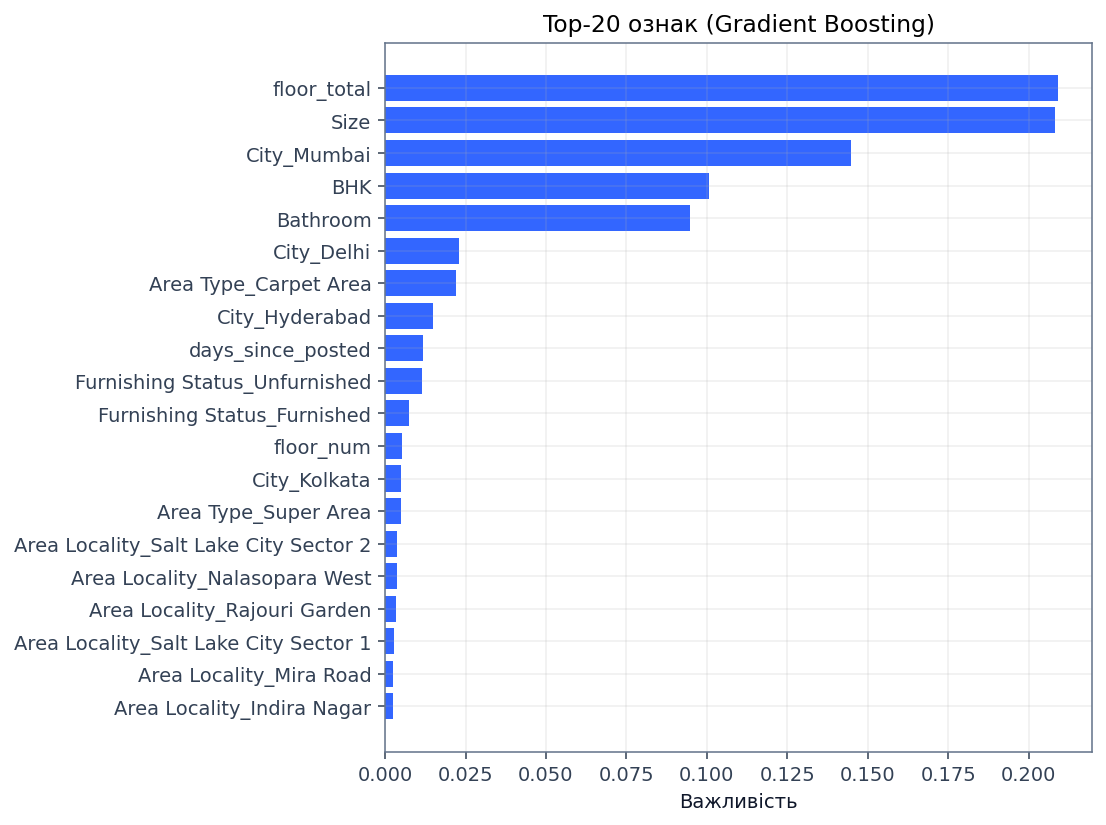

⚠️ Використовую permutation importance для SVR (RBF kernel) (може бути повільно)...
Не вдалося побудувати важливість ознак для SVR (RBF kernel): All arrays must be of the same length
⚠️ Використовую permutation importance для KNN Regressor (може бути повільно)...
Не вдалося побудувати важливість ознак для KNN Regressor: All arrays must be of the same length


In [55]:
from sklearn.inspection import permutation_importance

def get_feature_names(preprocess):
    feat_names = []
    for name, trans, cols in preprocess.transformers_:
        if name == "num":
            feat_names.extend(cols)
        elif name == "cat":
            ohe = trans.named_steps["onehot"]
            feat_names.extend(ohe.get_feature_names_out(cols))
    return feat_names

def plot_importances(model_name, pipeline, X, y, topk=20):
    preprocess = pipeline.named_steps["preprocess"]
    feat_names = get_feature_names(preprocess)

    model = pipeline.named_steps["model"]

    try:
        # --- Tree-based models
        if hasattr(model, "feature_importances_"):
            importances = model.feature_importances_

        # --- Linear Regression
        elif hasattr(model, "coef_"):
            importances = np.abs(model.coef_)  # беремо модуль коефіцієнтів

        # --- Fallback: permutation importance
        else:
            print(f"⚠️ Використовую permutation importance для {model_name} (може бути повільно)...")
            r = permutation_importance(pipeline, X, y, n_repeats=5, random_state=42, n_jobs=-1)
            importances = r.importances_mean

        fi = pd.DataFrame({"feature": feat_names, "importance": importances}) \
                .sort_values("importance", ascending=False) \
                .head(topk)

        print(f"\n=== Найважливіші ознаки ({model_name}, top-{topk}) ===")
        display(fi)

        # Барчарт
        plt.figure(figsize=(8,6))
        plt.barh(fi["feature"][::-1], fi["importance"][::-1])
        plt.xlabel("Важливість")
        plt.title(f"Top-{topk} ознак ({model_name})")
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Не вдалося побудувати важливість ознак для {model_name}: {e}")


# =========================
# Виклик для всіх моделей
# =========================
for name, model in models.items():
    pipe = Pipeline(steps=[
        ("preprocess", preprocess),
        ("model", model)
    ])
    pipe.fit(X_train, y_train)
    plot_importances(name, pipe, X_test, y_test, topk=20)


**2. Підбір оптимальних гіперпараметрів (GridSearch)**

In [56]:
from sklearn.model_selection import GridSearchCV

# Random Forest
param_grid_rf = {
    "model__n_estimators": [100, 300, 500],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_split": [2, 5, 10]
}

pipe_rf = Pipeline(steps=[("preprocess", preprocess), ("model", RandomForestRegressor(random_state=42, n_jobs=-1))])

grid_rf = GridSearchCV(pipe_rf, param_grid_rf, cv=5, scoring="r2", n_jobs=-1)
grid_rf.fit(X_train, y_train)
print("Best RF params:", grid_rf.best_params_)
print("Best RF score:", grid_rf.best_score_)

# Gradient Boosting
param_grid_gb = {
    "model__n_estimators": [100, 300],
    "model__max_depth": [3, 5],
    "model__learning_rate": [0.05, 0.1, 0.2]
}

pipe_gb = Pipeline(steps=[("preprocess", preprocess), ("model", GradientBoostingRegressor(random_state=42))])

grid_gb = GridSearchCV(pipe_gb, param_grid_gb, cv=5, scoring="r2", n_jobs=-1)
grid_gb.fit(X_train, y_train)
print("Best GB params:", grid_gb.best_params_)
print("Best GB score:", grid_gb.best_score_)


Best RF params: {'model__max_depth': 20, 'model__min_samples_split': 2, 'model__n_estimators': 500}
Best RF score: 0.6277864918484685
Best GB params: {'model__learning_rate': 0.2, 'model__max_depth': 5, 'model__n_estimators': 300}
Best GB score: 0.659348948282936


Висновок: отримаємо оптимальні параметри та оцінку за крос-валідацією.

** 4. Графік залишків (Residuals plot)**

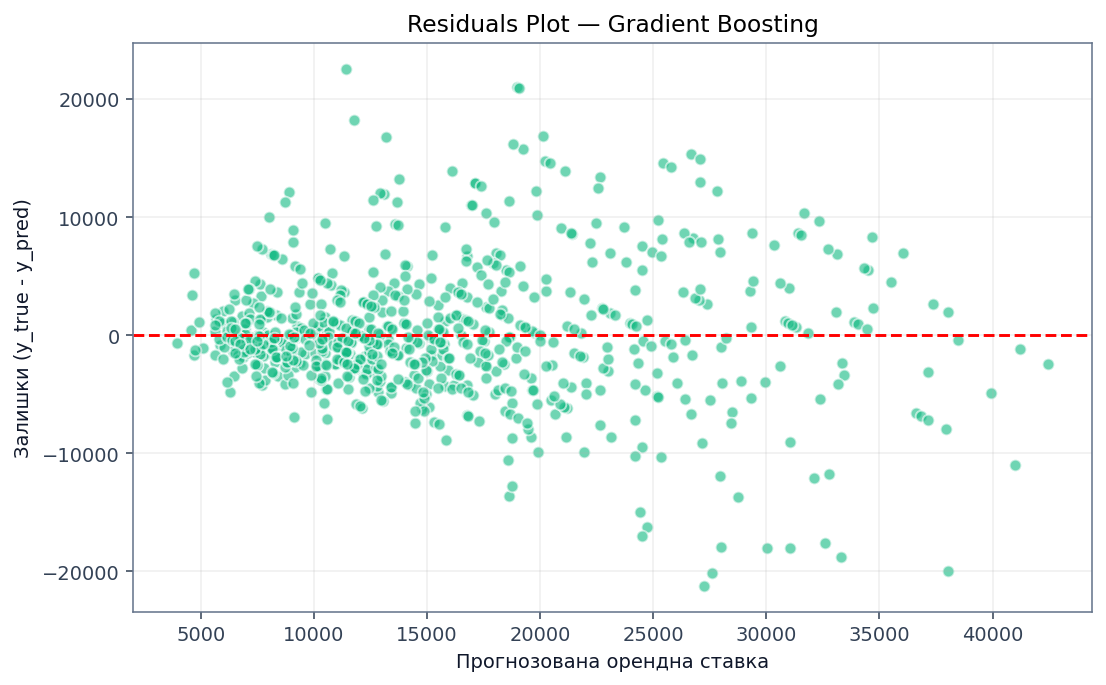

In [57]:
# Вибираємо модель (наприклад, Gradient Boosting з GridSearch)
best_gb = grid_gb.best_estimator_

y_pred_gb = best_gb.predict(X_test)
residuals = y_test - y_pred_gb

plt.figure(figsize=(8,5))
plt.scatter(y_pred_gb, residuals, alpha=0.6, color="#10b981", edgecolor="white")
plt.axhline(0, color="red", linestyle="--", linewidth=1.5)
plt.xlabel("Прогнозована орендна ставка")
plt.ylabel("Залишки (y_true - y_pred)")
plt.title("Residuals Plot — Gradient Boosting")
plt.tight_layout()
plt.show()
